# Data Overview

## stop locations

27,614 stop locations with addresses

In [9]:
import psycopg2
import pprint
import pandas as pd

conn = psycopg2.connect("postgres://:@localhost:5432/ruby_pipeline_demo_development")
cursor = conn.cursor()
get_stop_locations_sql = """
    SELECT
        *
    FROM
        stop_locations;
"""
stop_df = pd.read_sql(get_stop_locations_sql, conn)
conn.close()

stop_df

,id,street,location,stop_type,suburb,postcode,city,council,areas,latitude,longitude
0,44343,Thelma Court,Thelma Ct/Chirnside Ave (Werribee),Kerbside,Werribee,3030,Melbourne,Wyndham,Greater Metro,-37.909330,144.667663
1,44344,Clarence Street,Clarence Dr/Manor Lakes Bvd (Wyndham Vale),Kerbside,Wyndham Vale,3024,Melbourne,Wyndham,Greater Metro,-37.876314,144.607774
2,44345,Collins Street,Collins St/Greaves St (Werribee),Kerbside,Werribee,3030,Melbourne,Wyndham,Greater Metro,-37.911088,144.658196
3,44346,Westbourne Grammar School,Westbourne Grammar School/Marquands Rd (Trugan...,Kerbside,Truganina,3029,Melbourne,Wyndham,Greater Metro,-37.850228,144.727105
4,44347,Edgar Street,Edgar St/Greaves St (Werribee),Kerbside,Werribee,3030,Melbourne,Wyndham,Greater Metro,-37.897848,144.646830
...,...,...,...,...,...,...,...,...,...,...,...
27609,48443,Chairo Christian School,Chairo Christian School/Horn St (Leongatha),Kerbside,Leongatha,3953,South Gippsland,South Gippsland,Gippsland,-38.469915,145.960326
27610,50647,Wurruk,Hunt Pl/Princes Hwy (Wurruk),Bus Bay,Wurruk,3850,Wellington,Wellington,Gippsland,-38.105129,147.031412
27611,50648,Wurruk,Hunt Pl/Princes Hwy (Wurruk),Bus Bay,Wurruk,3850,Wellington,Wellington,Gippsland,-38.105499,147.031554
27612,376,Burke Rd,Burke Rd/Doncaster Rd (Kew East),Kerbside,Kew East,3102,Melbourne,Boroondara,Greater Metro,-37.793347,145.064876


### scans

scan ON and scan OFF events across a week of data per file

(array([ 1962.,   436.,   227.,   179.,   159.,  1657., 11195., 35740.,
        70901., 38644., 22437., 21304., 22914., 23576., 25656., 36058.,
        42086., 52398., 46147., 20910., 10537.,  8417.,  7127.,  4880.]),
 array([ 0.        ,  0.95833333,  1.91666667,  2.875     ,  3.83333333,
         4.79166667,  5.75      ,  6.70833333,  7.66666667,  8.625     ,
         9.58333333, 10.54166667, 11.5       , 12.45833333, 13.41666667,
        14.375     , 15.33333333, 16.29166667, 17.25      , 18.20833333,
        19.16666667, 20.125     , 21.08333333, 22.04166667, 23.        ]),
 <BarContainer object of 24 artists>)

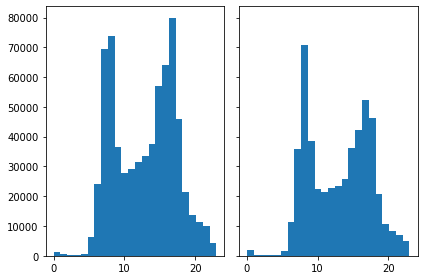

In [42]:
import matplotlib.pyplot as plt

conn = psycopg2.connect("postgres://:@localhost:5432/ruby_pipeline_demo_development")
cursor = conn.cursor()
get_scans_sql = """
    SELECT
        scan_on,
        date_time
    FROM
        scans;
"""
scan_df = pd.read_sql(get_scans_sql, conn)
conn.close()

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
hours = 24
# plt.hist(scan_df["date_time"].dt.hour, bins=hours)
axs[0].hist(scan_df.query("scan_on == True")["date_time"].dt.hour, bins=hours)
axs[1].hist(scan_df.query("scan_on == False")["date_time"].dt.hour, bins=hours)